In [1]:
import numpy as np
import pandas as pd
import re
data = pd.read_csv("googleplaystore.csv")

def getinstalls(x):
    out = ""
    for i in re.findall(r".*[^+]", x)[0].split(","): out+=i
    return out

data = data.drop(["App", "Current Ver", "Last Updated", "Android Ver", "Price", "Content Rating", "Genres"], axis=1)
data["Installs"] = data["Installs"].apply(getinstalls)
data["Installs"] = pd.to_numeric(data["Installs"])

In [2]:
data["Reviews"].describe().round()

count       10840.0
mean       444153.0
std       2927761.0
min             0.0
25%            38.0
50%          2094.0
75%         54776.0
max      78158306.0
Name: Reviews, dtype: float64

In [3]:
data["Reviews"].value_counts()

0         596
1         272
2         214
3         175
4         137
         ... 
4272        1
5517        1
4057        1
459797      1
398307      1
Name: Reviews, Length: 6001, dtype: int64

C:\Users\mischa\AppData\Local\Temp\ipykernel_12200\3452621462.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Reviews"], shade=True)


<AxesSubplot: xlabel='Reviews', ylabel='Density'>

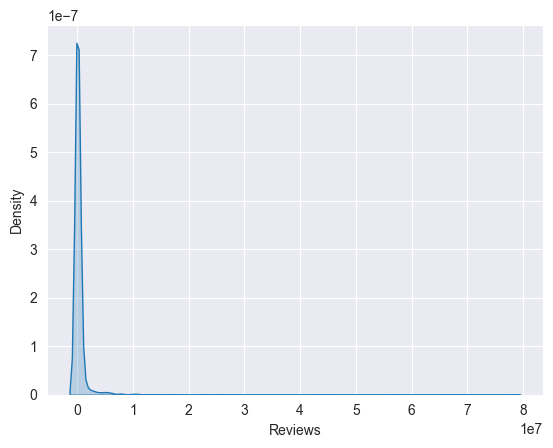

In [4]:
import seaborn as sns
sns.kdeplot(data["Reviews"], shade=True)

<AxesSubplot: >

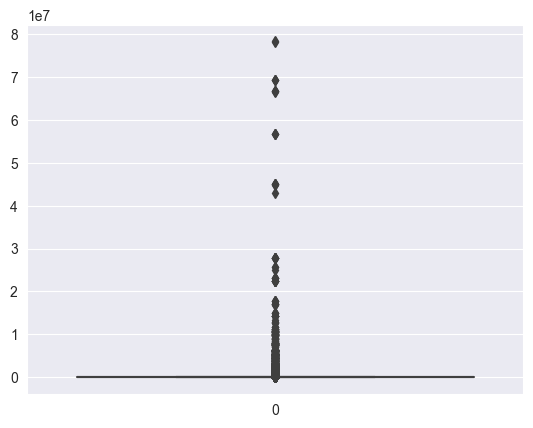

In [5]:
sns.boxplot(data.Reviews)

<AxesSubplot: >

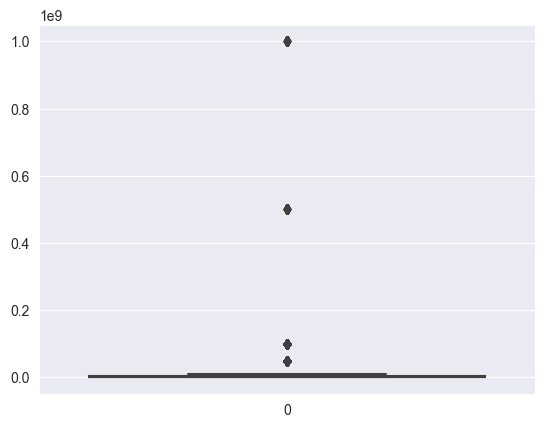

In [6]:
sns.boxplot(data.Installs)

<AxesSubplot: >

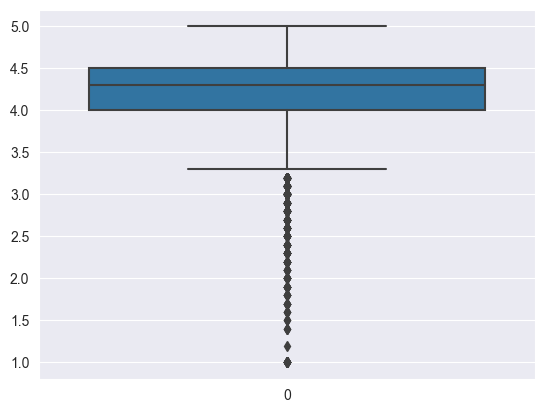

In [7]:
sns.boxplot(data.Rating)

In [8]:
data[data.Rating >= 3.5].Rating.describe()

count    8633.000000
mean        4.302004
std         0.328704
min         3.500000
25%         4.100000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [9]:
data.loc[data.Rating<3.5, ["Rating"]] = data.Rating.median()

<AxesSubplot: >

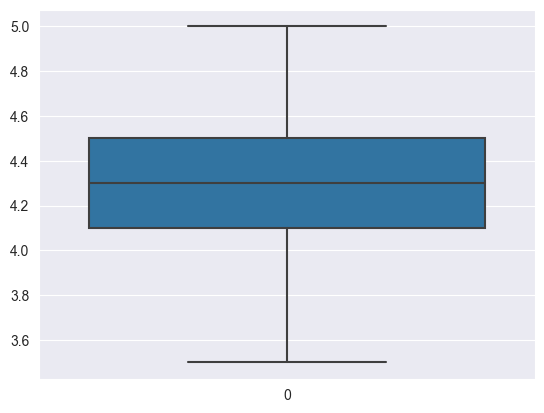

In [10]:
sns.boxplot(data.Rating)

In [11]:
data.Rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10835    4.5
10836    5.0
10837    NaN
10838    4.5
10839    4.5
Name: Rating, Length: 10840, dtype: float64

In [12]:
data["Size"]

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10835                   53M
10836                  3.6M
10837                  9.5M
10838    Varies with device
10839                   19M
Name: Size, Length: 10840, dtype: object

In [13]:
def sizefunc(size):
    if 'M' in size:
        return(float(size[:-1])*1000)
    elif 'k' == size[-1:]:
        return(float(size[:-1]))
    else:
        return None

data["Size"] = data["Size"].map(sizefunc)
data.Size.fillna(method = 'ffill', inplace = True)
data["Size"]


0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10835    53000.0
10836     3600.0
10837     9500.0
10838     9500.0
10839    19000.0
Name: Size, Length: 10840, dtype: float64

In [14]:
data.Size.describe()

count     10840.000000
mean      21846.221172
std       22523.241231
min           8.500000
25%        5100.000000
50%       14000.000000
75%       30000.000000
max      100000.000000
Name: Size, dtype: float64

In [15]:
data1 = data.copy()


In [16]:
def outlayers(data, field):
    distance = 1.5 * (np.percentile(data[field], 75) - np.percentile(data[field], 25))
    data.drop(data[data[field] > distance + np.percentile(data[field], 75)].index, inplace=True)
    data.drop(data[data[field] < np.percentile(data[field], 25) - distance].index, inplace=True)

<AxesSubplot: >

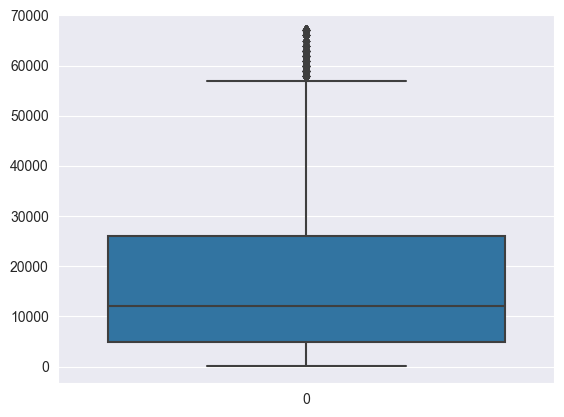

In [17]:
outlayers(data, "Size")
sns.boxplot(data.Size)


C:\Users\mischa\PycharmProjects\GooglePlay\venv\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: >

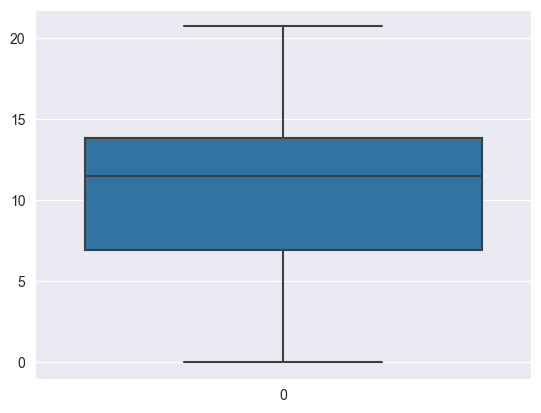

In [18]:
data.Installs = np.log(data.Installs)
outlayers(data, "Installs")
sns.boxplot(data.Installs)

<AxesSubplot: >

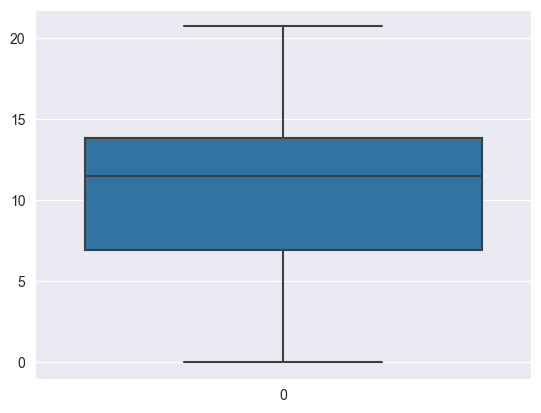

In [19]:
sns.boxplot(data.Installs)

In [20]:
data.Installs.describe()

count    10164.000000
mean        11.061695
std          4.510976
min          0.000000
25%          6.907755
50%         11.512925
75%         13.815511
max         20.723266
Name: Installs, dtype: float64

In [21]:
data.loc[data.Installs <= 4, ["Installs"]] = data.Installs.median()

<AxesSubplot: >

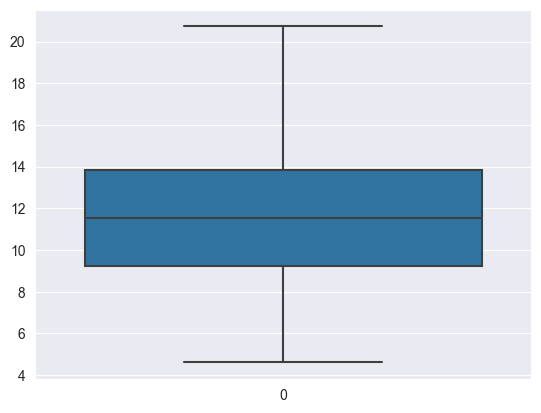

In [22]:
sns.boxplot(data.Installs)

In [23]:
data.Size.describe()

count    10164.000000
mean     17811.062328
std      16291.337921
min          8.500000
25%       4800.000000
50%      12000.000000
75%      26000.000000
max      67000.000000
Name: Size, dtype: float64

In [24]:
data.loc[data.Size > 50000, "Size"] = data.Size.median()

<AxesSubplot: >

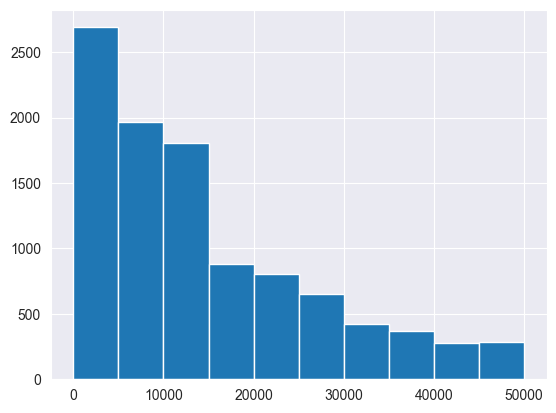

In [25]:
data.Size.hist()

<AxesSubplot: >

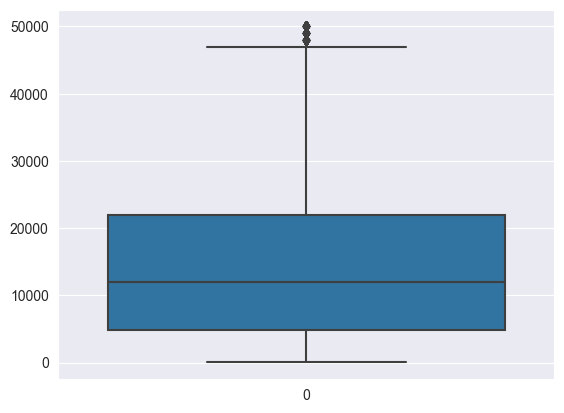

In [26]:
sns.boxplot(data.Size)

In [27]:
data.Reviews.info()

<class 'pandas.core.series.Series'>
Int64Index: 10164 entries, 0 to 10839
Series name: Reviews
Non-Null Count  Dtype
--------------  -----
10164 non-null  int64
dtypes: int64(1)
memory usage: 416.9 KB


<AxesSubplot: >

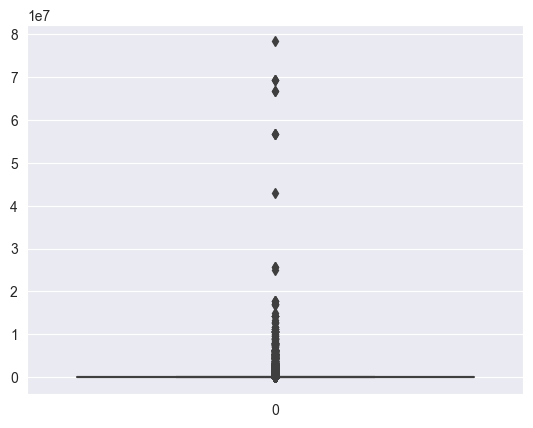

In [28]:
sns.boxplot(data.Reviews)

C:\Users\mischa\PycharmProjects\GooglePlay\venv\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: >

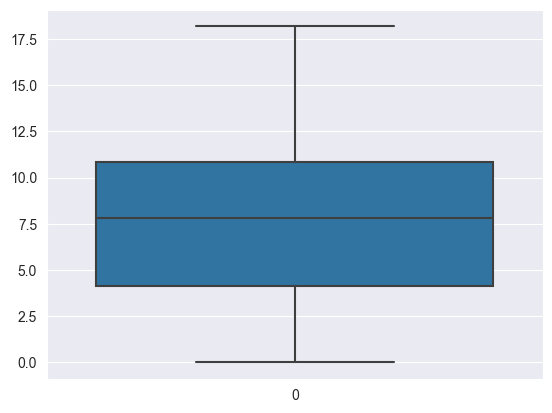

In [29]:
data.Reviews = np.log(data.Reviews)
outlayers(data, "Reviews")
sns.boxplot(data.Reviews)

dic = {"Free":0, "Paid":1}
data.Type = data.Type.replace(dic)
data.Type

In [30]:
def pricer(price):
    if price == "Free":
        return 0
    else:
        return 1
data["Type"] = data["Type"].map(pricer)

In [31]:
data["Type"]

0        0
1        0
2        0
3        0
4        0
        ..
10835    0
10836    0
10837    0
10838    0
10839    0
Name: Type, Length: 9589, dtype: int64

In [32]:
data.Category.value_counts()

FAMILY                 1692
GAME                    873
TOOLS                   794
PRODUCTIVITY            380
MEDICAL                 379
BUSINESS                377
COMMUNICATION           356
PERSONALIZATION         356
LIFESTYLE               341
FINANCE                 337
SPORTS                  335
PHOTOGRAPHY             327
HEALTH_AND_FITNESS      305
NEWS_AND_MAGAZINES      264
SOCIAL                  261
SHOPPING                253
TRAVEL_AND_LOCAL        229
DATING                  212
BOOKS_AND_REFERENCE     205
VIDEO_PLAYERS           167
EDUCATION               148
ENTERTAINMENT           144
MAPS_AND_NAVIGATION     130
FOOD_AND_DRINK          117
LIBRARIES_AND_DEMO       81
HOUSE_AND_HOME           80
AUTO_AND_VEHICLES        79
WEATHER                  79
ART_AND_DESIGN           64
COMICS                   60
EVENTS                   58
PARENTING                55
BEAUTY                   51
Name: Category, dtype: int64

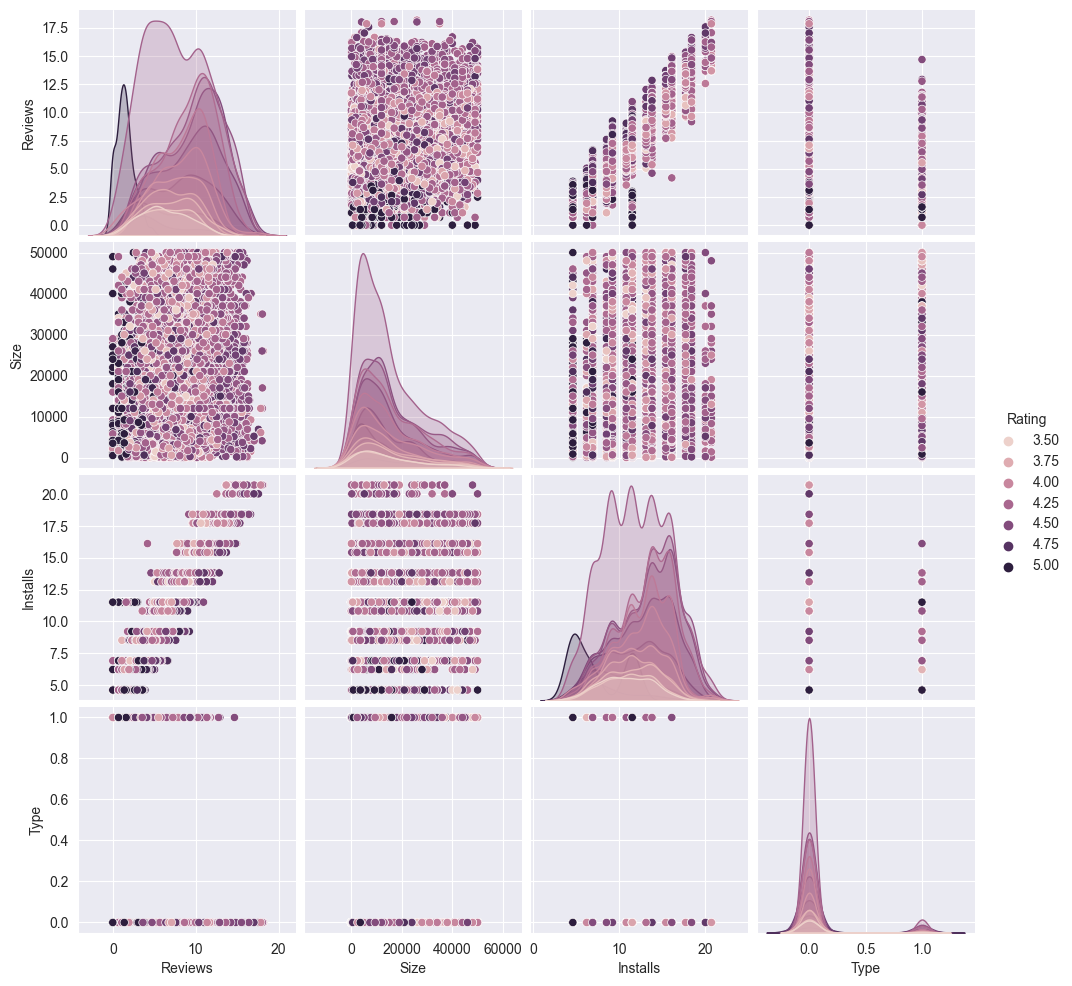

In [33]:
sns.pairplot(data, hue="Rating")

C:\Users\mischa\AppData\Local\Temp\ipykernel_12200\264670479.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr() [["Rating"]].sort_values(by="Rating", ascending=False), cmap="rainbow",vmin=-1, vmax=1, annot=True)


<AxesSubplot: >

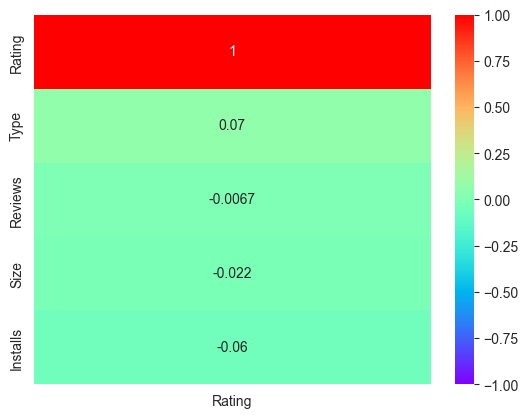

In [34]:
sns.heatmap(data.corr() [["Rating"]].sort_values(by="Rating", ascending=False), cmap="rainbow",vmin=-1, vmax=1, annot=True)

In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler

lbe = LabelEncoder()
data.Category = lbe.fit_transform(data.Category)
data.Category.head(100)

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    2
99    2
Name: Category, Length: 100, dtype: int32

In [36]:
data.Category.value_counts()

11    1692
14     873
29     794
25     380
20     379
4      377
6      356
23     356
18     341
12     337
28     335
24     327
15     305
21     264
27     261
26     253
30     229
7      212
3      205
31     167
8      148
9      144
19     130
13     117
17      81
16      80
1       79
32      79
0       64
5       60
10      58
22      55
2       51
Name: Category, dtype: int64

In [37]:
data.Category = data.Category.astype("category")

In [38]:
data.Type = data.Type.astype("category")

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9589 entries, 0 to 10839
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Category  9589 non-null   category
 1   Rating    8726 non-null   float64 
 2   Reviews   9589 non-null   float64 
 3   Size      9589 non-null   float64 
 4   Installs  9589 non-null   float64 
 5   Type      9589 non-null   category
dtypes: category(2), float64(4)
memory usage: 652.8 KB


array([[<AxesSubplot: title={'center': 'Rating'}>,
        <AxesSubplot: title={'center': 'Reviews'}>],
       [<AxesSubplot: title={'center': 'Size'}>,
        <AxesSubplot: title={'center': 'Installs'}>]], dtype=object)

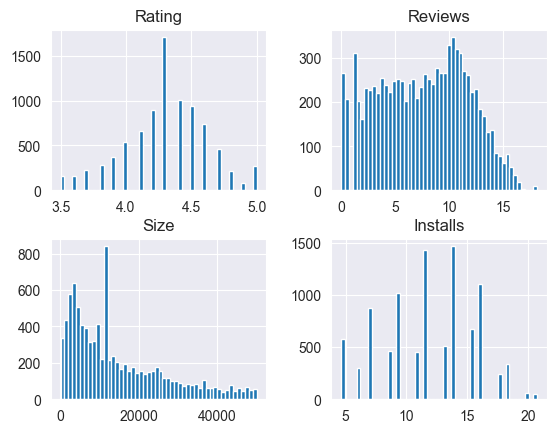

In [40]:
data.hist(bins=50)

In [41]:
sscaler = StandardScaler()
rscaler = RobustScaler()
data_scaled = pd.DataFrame(rscaler.fit_transform(data))

data_scaled.head()

,0,1,2,3,4,5
0,-1.071429,-0.5,-0.404299,0.409357,-0.370512,0.0
1,-1.071429,-1.0,-0.136179,0.116959,0.258977,0.0
2,-1.071429,1.0,0.532945,-0.192982,0.629488,0.0
3,-1.071429,0.5,0.666891,0.760234,1.000000,0.0
4,-1.071429,0.0,-0.136179,-0.538012,0.000000,0.0


array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>],
       [<AxesSubplot: title={'center': '2'}>,
        <AxesSubplot: title={'center': '3'}>],
       [<AxesSubplot: title={'center': '4'}>,
        <AxesSubplot: title={'center': '5'}>]], dtype=object)

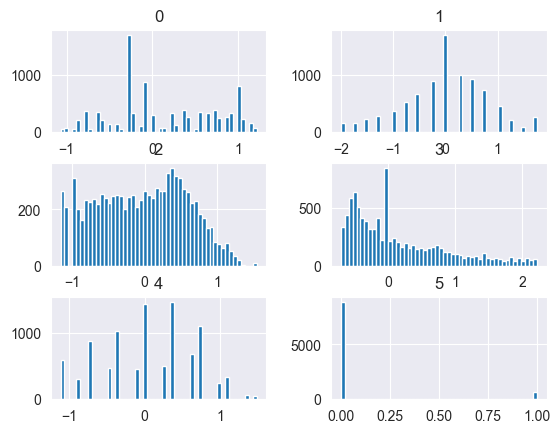

In [42]:
data_scaled.hist(bins=50)

In [43]:

from sklearn.model_selection import train_test_split
y = data.Rating
x = data.drop(["Rating"], axis=1)
y.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

In [44]:
x.head()

,Category,Reviews,Size,Installs,Type
0,0,5.068904,19000.0,9.210340,0
1,0,6.874198,14000.0,13.122363,0
2,0,11.379508,8700.0,15.424948,0
3,0,12.281384,25000.0,17.727534,0
4,0,6.874198,2800.0,11.512925,0


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)
x_train.head()

,Category,Reviews,Size,Installs,Type
8680,24,6.664409,18000.0,11.512925,0
4228,29,9.004177,3900.0,13.815511,0
4510,11,5.049856,43000.0,9.210340,0
9960,30,4.317488,19000.0,6.907755,0
10325,4,0.693147,8000.0,11.512925,0
